In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as  pd
import yfinance as yf
import statsmodels.api as sm
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from scipy.stats import chi2
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv("Index2018.csv")
df.date = pd.to_datetime(df.date, dayfirst=True)
df.set_index('date', inplace=True)
df = df.asfreq('b')  # setting the Desired Frequency
df= df.fillna(method='ffill')  # fill missing values with forward fill
df['market_value'] = df.ftse
# Delete columns dax, ftse, nikkei and rename spx to market_value
df.drop(['dax', 'ftse', 'nikkei', 'spx'], axis=1, inplace=True)

size = int(len(df) * 0.8)
df, df_test = df[:size], df[size:]

df['returns'] = df.market_value.pct_change(1)*100
# Remove NaN values from the DataFrame
df.dropna(inplace=True)
df

C:\Users\Niranjan\AppData\Local\Temp\ipykernel_36736\503749443.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill')  # fill missing values with forward fill


,market_value,returns
date,,
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842
...,...,...
2013-04-01,6411.74,0.000000
2013-04-02,6490.66,1.230867
2013-04-03,6420.28,-1.084327


### Creating squared returns

In [3]:
#creating a new column for squared returns (sq_returns)

df['sq_returns'] = df['returns'] ** 2

### Returns vs Squared Returns

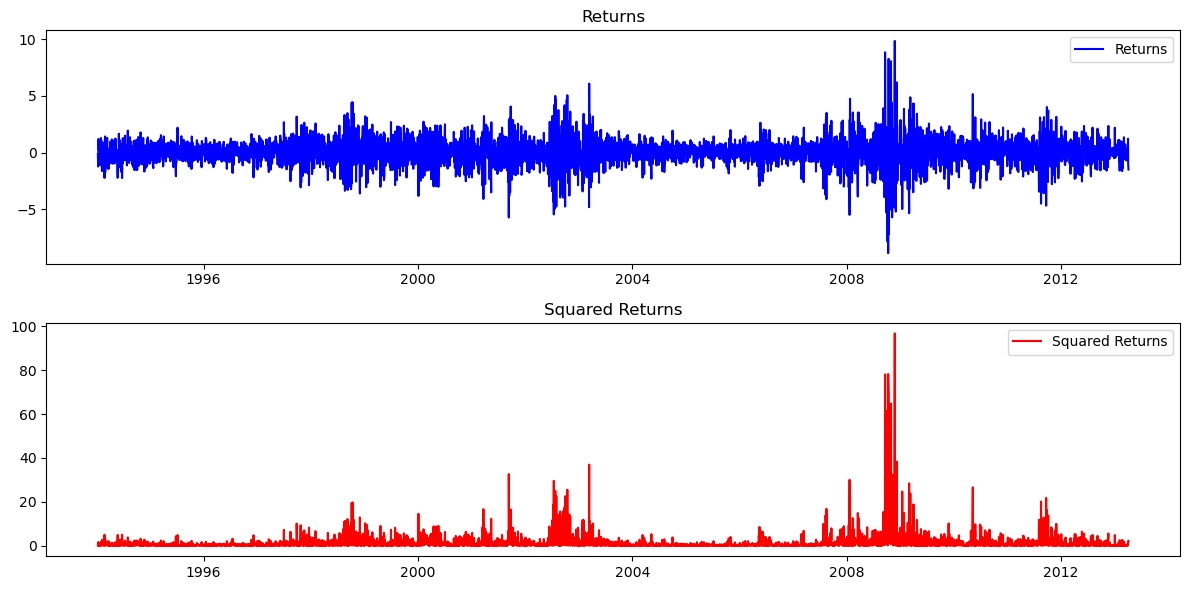

In [4]:
# plotting returns and squared returns
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['returns'], label='Returns', color='blue')
plt.title('Returns')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(df.index, df['sq_returns'], label='Squared Returns', color='red')
plt.title('Squared Returns')
plt.legend()
plt.tight_layout()
plt.show()

# ARCH Model

### Descriptive statistics

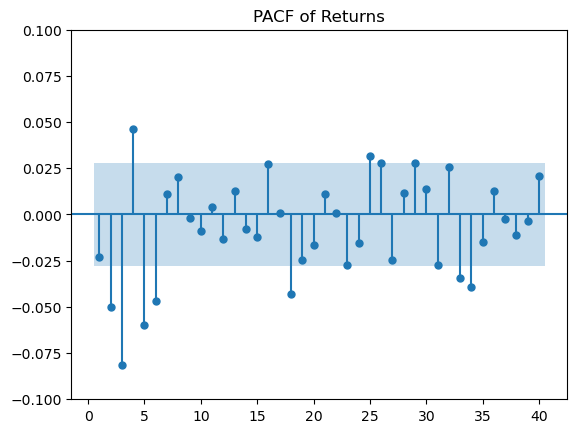

In [5]:
# plot the pacf of returns 
sgt.plot_pacf(df['returns'], lags=40, zero=False, alpha=0.05, method='ols')
plt.ylim(-0.1, 0.1)  # Zoom y-axis
plt.title('PACF of Returns')
plt.show()

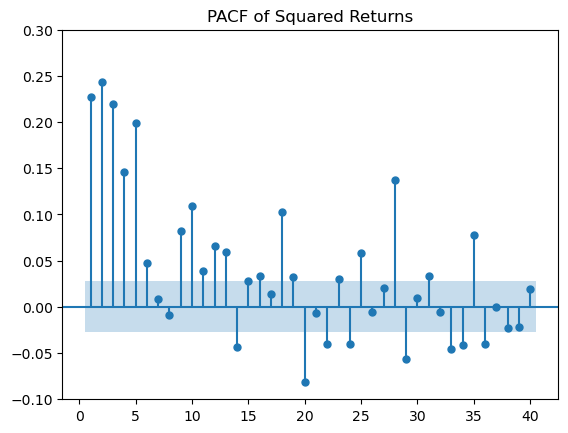

In [6]:
# plot the pacf of squared returns
sgt.plot_pacf(df['sq_returns'], lags=40, zero=False, alpha=0.05, method='ols')
plt.ylim(-0.1, 0.3)  # Zoom y-axis
plt.title('PACF of Squared Returns')
plt.show()

### The arch_model() Method

In [7]:
from arch import arch_model

In [8]:
model_arch_1 = arch_model(df['returns'])
model_arch_1_fit = model_arch_1.fit()
print(model_arch_1_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6579303469.390623
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2701100877.2298183
Iteration:      3,   Func. Count:     23,   Neg. LLF: 7009.030632045198
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7024.035884053223
Iteration:      5,   Func. Count:     35,   Neg. LLF: 7010.712866814991
Iteration:      6,   Func. Count:     41,   Neg. LLF: 6975.418107495356
Iteration:      7,   Func. Count:     47,   Neg. LLF: 7092.271289251072
Iteration:      8,   Func. Count:     53,   Neg. LLF: 6973.8792679196495
Iteration:      9,   Func. Count:     59,   Neg. LLF: 6970.088049064454
Iteration:     10,   Func. Count:     64,   Neg. LLF: 6970.058478417896
Iteration:     11,   Func. Count:     69,   Neg. LLF: 6970.058367475591
Iteration:     12,   Func. Count:     74,   Neg. LLF: 6970.058366189888
Iteration:     13,   Func. Count:     78,   Neg. LLF: 6970.058366189172
Optimization terminated successfully    (Exit mode 0)
        

### The simple ARCH(1)

In [9]:
model_arch_1 = arch_model(df['returns'], mean="Constant", vol='ARCH', p=1, q=0)
model_arch_1_fit = model_arch_1.fit()
print(model_arch_1_fit.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 29071.83486537579
Iteration:      2,   Func. Count:     13,   Neg. LLF: 12040.736044828116
Iteration:      3,   Func. Count:     20,   Neg. LLF: 7809.7227529035545
Iteration:      4,   Func. Count:     26,   Neg. LLF: 7660.088789376123
Iteration:      5,   Func. Count:     30,   Neg. LLF: 7660.088782040875
Iteration:      6,   Func. Count:     33,   Neg. LLF: 7660.088782040906
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7660.088782040875
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7660.09
Distribution:                  Normal   AIC

### ARCH(2)

In [10]:
model_arch_2 = arch_model(df['returns'], mean="Constant", vol='ARCH', p=2, q=0)
model_arch_2_fit = model_arch_2.fit()
print(model_arch_2_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 34336.61062838968
Iteration:      2,   Func. Count:     15,   Neg. LLF: 11809.810463437398
Iteration:      3,   Func. Count:     24,   Neg. LLF: 7900.582867042022
Iteration:      4,   Func. Count:     31,   Neg. LLF: 7647.101576187482
Iteration:      5,   Func. Count:     37,   Neg. LLF: 8810.02930517937
Iteration:      6,   Func. Count:     44,   Neg. LLF: 7449.551200532487
Iteration:      7,   Func. Count:     49,   Neg. LLF: 7449.545177539265
Iteration:      8,   Func. Count:     54,   Neg. LLF: 7449.545164098316
Iteration:      9,   Func. Count:     58,   Neg. LLF: 7449.545164098206
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7449.545164098316
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                

In [11]:
model_arch_3 = arch_model(df['returns'], mean="Constant", vol='ARCH', p=3, q=0)
model_arch_3_fit = model_arch_3.fit()
print(model_arch_3_fit.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 39962.465851469606
Iteration:      2,   Func. Count:     18,   Neg. LLF: 11954.630689597143
Iteration:      3,   Func. Count:     27,   Neg. LLF: 8336.666751802351
Iteration:      4,   Func. Count:     34,   Neg. LLF: 7489.93945684613
Iteration:      5,   Func. Count:     41,   Neg. LLF: 7496.4079308108885
Iteration:      6,   Func. Count:     48,   Neg. LLF: 7393.754032519646
Iteration:      7,   Func. Count:     56,   Neg. LLF: 7301.714171954324
Iteration:      8,   Func. Count:     63,   Neg. LLF: 7277.050581173273
Iteration:      9,   Func. Count:     69,   Neg. LLF: 7277.050453151904
Iteration:     10,   Func. Count:     75,   Neg. LLF: 7277.050452148393
Iteration:     11,   Func. Count:     80,   Neg. LLF: 7277.0504521483745
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7277.050452148393
            Iterations: 11
            Function evaluations: 80
            Gradient evaluations:

# General Framework for ARCH and GARCH

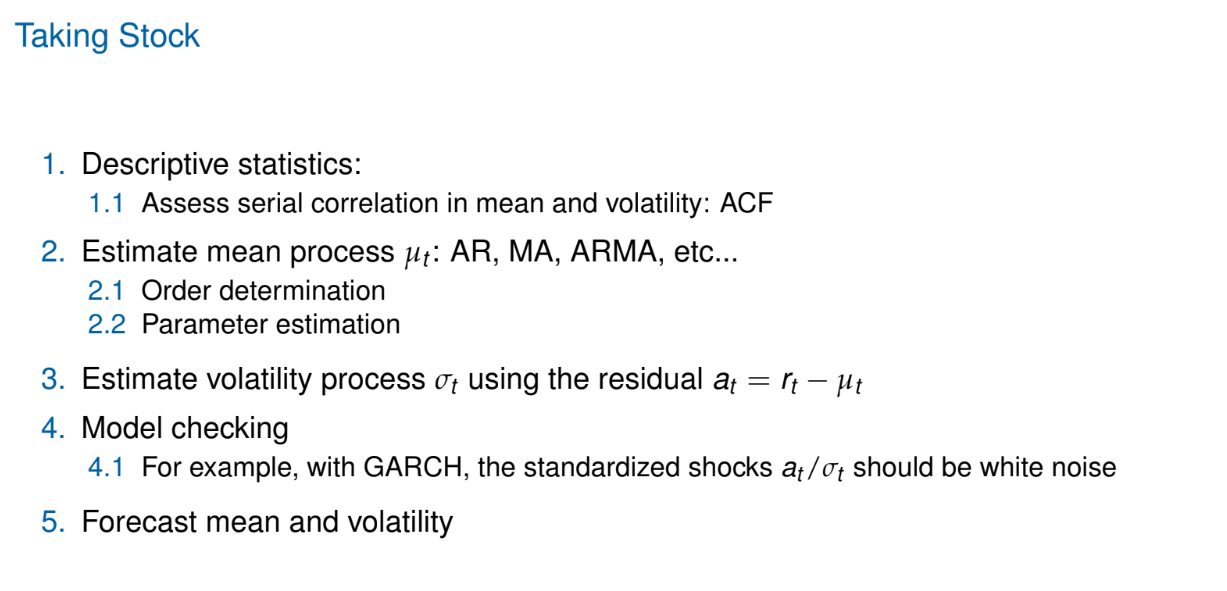

In [51]:
from IPython.display import Image

Image('D:/D/UMD/Projects/Time series models/Vol_modelling_steps.png')


# ARCH Model

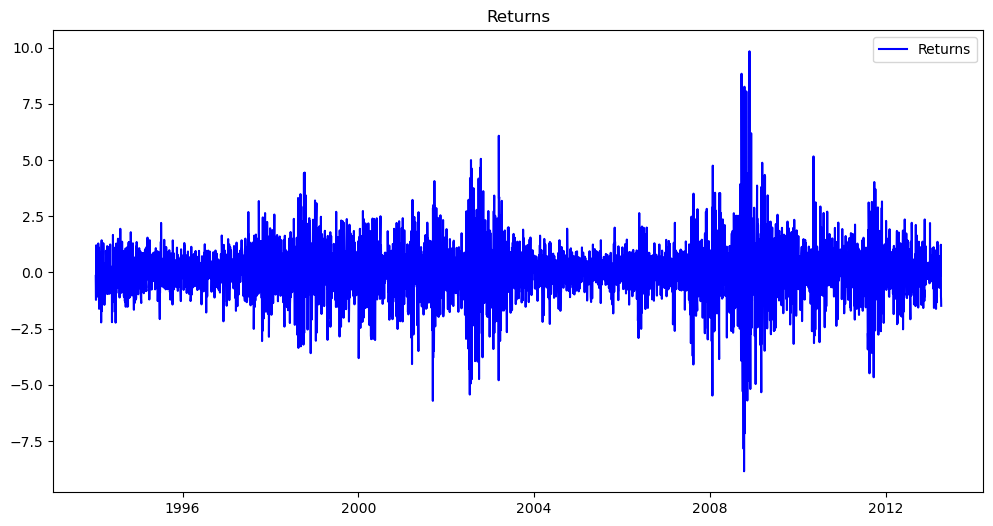

In [13]:
# plotting the returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['returns'], label='Returns', color='blue')
plt.title('Returns')
plt.legend()
plt.show()

## 1. Descriptive statistics: ACF

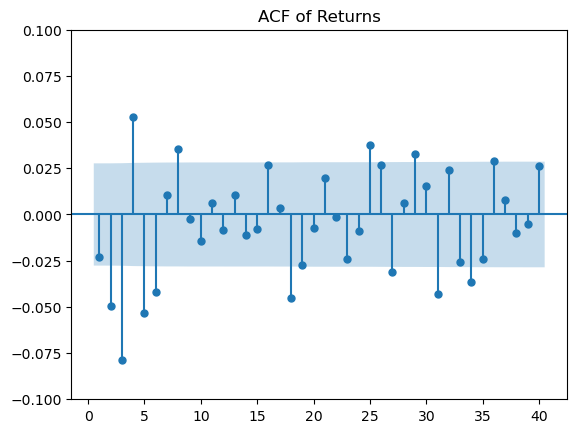

In [14]:
# plotting the acf of returns
sgt.plot_acf(df.returns, lags=40, zero=False, alpha=0.05)
plt.ylim(-0.1, 0.1)  # Zoom y-axis
plt.title('ACF of Returns')
plt.show()

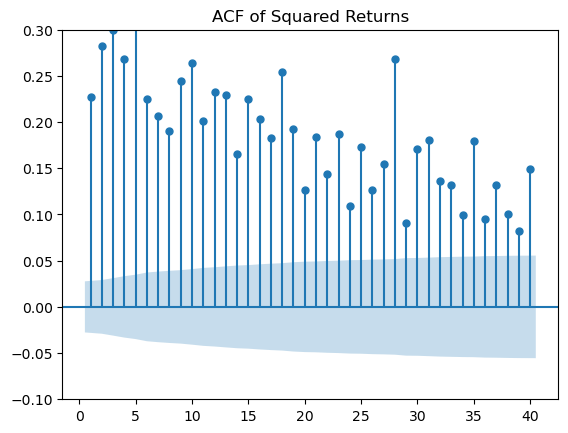

In [15]:
# plotting the acf of squared returns
sgt.plot_acf(df.sq_returns, lags=40, zero=False, alpha=0.05)
plt.ylim(-0.1, 0.3)  # Zoom y-axis
plt.title('ACF of Squared Returns')
plt.show()

## 2. Estimate mean process: AR model

### 2.1 order determination: PACF

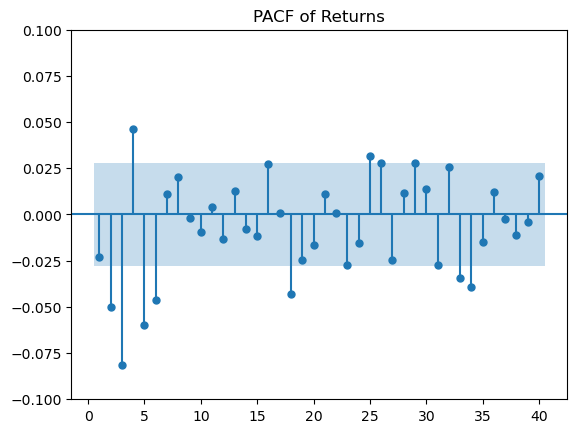

In [16]:
# plot the pacf of returns
sgt.plot_pacf(df['returns'], lags=40, zero=False, alpha=0.05)
plt.ylim(-0.1, 0.1)  # Zoom y-axis
plt.title('PACF of Returns')
plt.show()

### 2.2 order determination: AIC or BIC

In [17]:
# calculate AIC and BIC for AR models

BIC = np.zeros(11)
AIC = np.zeros(11)

for i in range(1, 11):
    model = ARIMA(df['returns'], order=(i, 0, 0))
    results = model.fit()
    BIC[i] = results.bic
    AIC[i] = results.aic

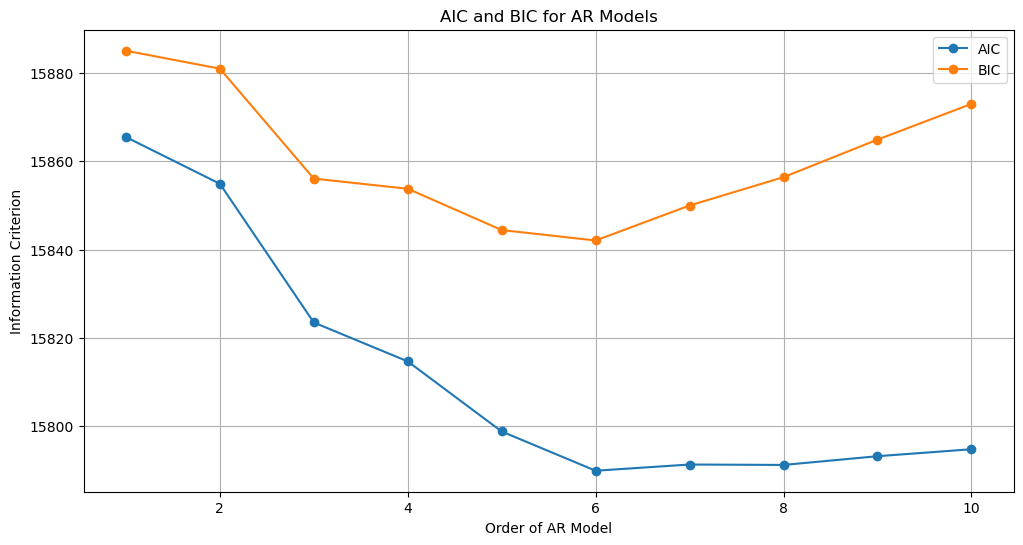

In [18]:
# plot the AIC and BIC
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), AIC[1:], label='AIC', marker='o')
plt.plot(range(1, 11), BIC[1:], label='BIC', marker='o')
plt.title('AIC and BIC for AR Models')
plt.xlabel('Order of AR Model')
plt.ylabel('Information Criterion')
plt.legend()
plt.grid()
plt.show()

* From the above graph, we should choose AR model with 6 lags i.e **AR(6)**

### 2.3 Estimate the parameters of the AR model

In [19]:
model_ar_6 = ARIMA(df['returns'], order=(6, 0, 0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -7886.945
Date:                Tue, 05 Aug 2025   AIC                          15789.890
Time:                        12:42:12   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.324      0.186      -0.009       0.047
ar.L1         -0.0245      0.009     -2.640      0.008      -0.043      -0.006
ar.L2         -0.0523      0.008     -6.505      0.0

## 3. Volatility Modelling

### 3.1. Test for ARCH effects

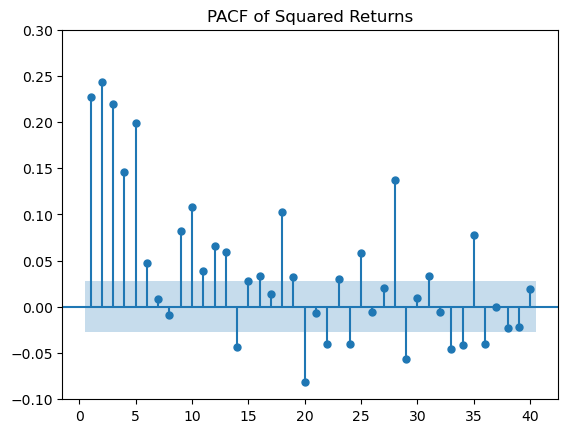

In [20]:
# plot the pacf of the squared returns
sgt.plot_pacf(df['sq_returns'], lags=40, zero=False, alpha=0.05)
plt.ylim(-0.1, 0.3)  # Zoom y-axis
plt.title('PACF of Squared Returns')
plt.show()


* Based on the PACF graph, volatility is serially correlated which could be noticed from the first few significant lags.

### 3.2.  Testing for ARCH effects

In [21]:
# Engle test for ARCH effects which prints p value
from statsmodels.stats.diagnostic import het_arch
arch_test = het_arch(df['returns'])
print(f"Engle's ARCH test p-value: {arch_test[1]}")

Engle's ARCH test p-value: 5.907033417727355e-229


* This significant p value proves that we can reject the null hypothesis which says that there is no autocorrelation in volatility. 

### 3.3. Estimate ARCH model

In [39]:
df

,market_value,returns,sq_returns
date,,,
1994-01-10,3440.58,-0.156704,0.024556
1994-01-11,3413.77,-0.779229,0.607198
1994-01-12,3372.02,-1.222988,1.495700
1994-01-13,3360.01,-0.356166,0.126854
1994-01-14,3400.56,1.206842,1.456467
...,...,...,...
2013-04-01,6411.74,0.000000,0.000000
2013-04-02,6490.66,1.230867,1.515034
2013-04-03,6420.28,-1.084327,1.175766


In [46]:
model_arch_1 = arch_model(df['returns'], mean="Constant", vol='ARCH', p=10)
model_arch_1_fit = model_arch_1.fit(disp='off')
print(model_arch_1_fit.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7011.98
Distribution:                  Normal   AIC:                           14048.0
Method:            Maximum Likelihood   BIC:                           14126.2
                                        No. Observations:                 5020
Date:                Tue, Aug 05 2025   Df Residuals:                     5019
Time:                        13:11:45   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0522  1.189e-02      4.391  1.130e-05 [2.

### Estimate ARCH(1) model

In [50]:
model_arch_1 = arch_model(df['returns'], mean="constant", vol='ARCH', p=1, q=0)
model_arch_1_fit = model_arch_1.fit(disp='off')
print(model_arch_1_fit.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7660.09
Distribution:                  Normal   AIC:                           15326.2
Method:            Maximum Likelihood   BIC:                           15345.7
                                        No. Observations:                 5020
Date:                Wed, Aug 06 2025   Df Residuals:                     5019
Time:                        00:13:56   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0345  1.603e-02      2.151  3.147e-02 [3.

In [65]:
model_arch_1 = arch_model(df['returns'], mean="AR", lags=6, vol='ARCH', p=12, q=0)
model_arch_1_fit = model_arch_1.fit(disp='off')
print(model_arch_1_fit.summary())

                           AR - ARCH Model Results                            
Dep. Variable:                returns   R-squared:                       0.012
Mean Model:                        AR   Adj. R-squared:                  0.011
Vol Model:                       ARCH   Log-Likelihood:               -6966.95
Distribution:                  Normal   AIC:                           13973.9
Method:            Maximum Likelihood   BIC:                           14104.3
                                        No. Observations:                 5014
Date:                Wed, Aug 06 2025   Df Residuals:                     5007
Time:                        00:32:50   Df Model:                            7
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
Const           0.0588  1.260e-02      4.670  3.0

### 📌 Should We Use a Constant or AR Process for the Mean in ARCH Models?

#### ✅ Does ARCH Assume a Time-Invariant Mean?

Yes. The **basic ARCH model** assumes that the **mean of returns is constant** over time. The model is:

$$
r_t = \mu + \epsilon_t, \quad \epsilon_t \sim \mathcal{N}(0, \sigma_t^2)
$$

$$
\sigma_t^2 = \omega + \alpha_1 \epsilon_{t-1}^2 + \alpha_2 \epsilon_{t-2}^2 + \cdots + \alpha_q \epsilon_{t-q}^2
$$

- \(\mu\) is **constant** — this is the **time-invariant mean assumption**.
- The **volatility** \(\sigma_t^2\) is **time-varying** and driven by past squared shocks.

---

#### 🤔 What Mean Models Can We Use in `arch_model()`?

- `mean="Zero"` → assumes \(\mu = 0\)
- `mean="Constant"` → assumes \(\mu\) is a fixed scalar
- `mean="AR"` → allows time-varying \(\mu_t\) using autoregressive lags:
  $$
  \mu_t = \mu + \sum_{i=1}^{p} \phi_i r_{t-i}
  $$

---

#### 🧠 When Should You Use Each?

| Situation                                      | Use Mean Model        |
|-----------------------------------------------|------------------------|
| No autocorrelation in returns                 | `mean="Constant"` or `"Zero"` |
| Significant autocorrelation in returns        | `mean="AR"` with selected lags |
| You only care about volatility modeling       | `mean="Constant"`     |
| You're forecasting returns + volatility       | `mean="AR"`           |
| You have external predictors (e.g. macro vars)| `mean="ARX"`          |

---

#### ⚠️ Important:

- If you **add AR terms**, you're **relaxing the ARCH assumption** of a fixed mean.
- That's fine **if there's evidence** (via ACF, PACF, or model fit) that the mean is time-varying.
- Otherwise, you're **overfitting** the mean while the real action is in the volatility.

---

#### ✅ Summary:

> The classic ARCH model assumes a **time-invariant mean**, so by default we should use `mean="Constant"` or `mean="Zero"` unless we have strong evidence to use an `AR` mean process.
